In [29]:
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('HousingData.csv')


In [3]:
df.columns



Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
cor = df.corr()


In [5]:
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


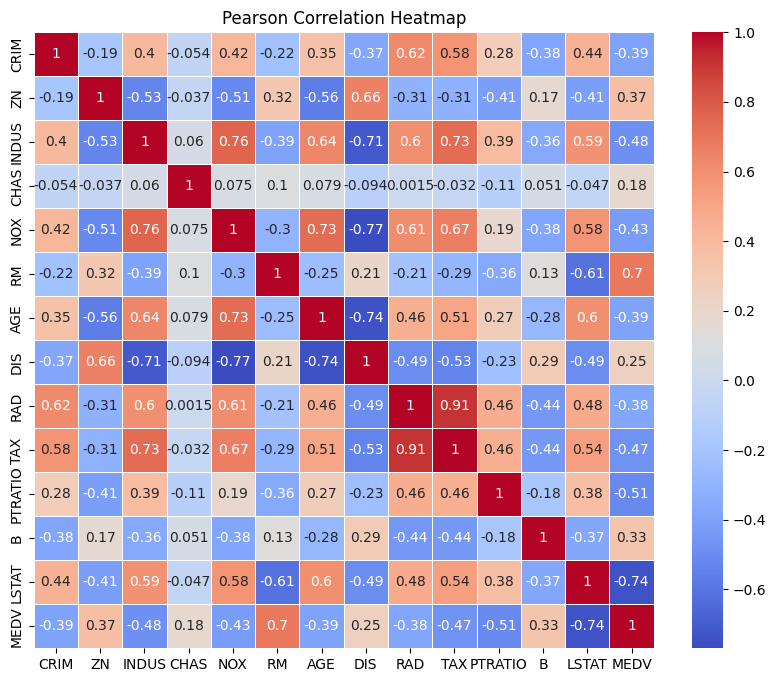

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [7]:
output_corr = cor['MEDV'] 
output_corr

CRIM      -0.391363
ZN         0.373136
INDUS     -0.481772
CHAS       0.181391
NOX       -0.427321
RM         0.695360
AGE       -0.394656
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.735822
MEDV       1.000000
Name: MEDV, dtype: float64

In [8]:
selected_features= output_corr[output_corr.abs()>0.6]

In [9]:
selected_features

RM       0.695360
LSTAT   -0.735822
MEDV     1.000000
Name: MEDV, dtype: float64

Text(0.5, 0.92, '3D Scatter Plot of RM, LSTAT vs MEDV')

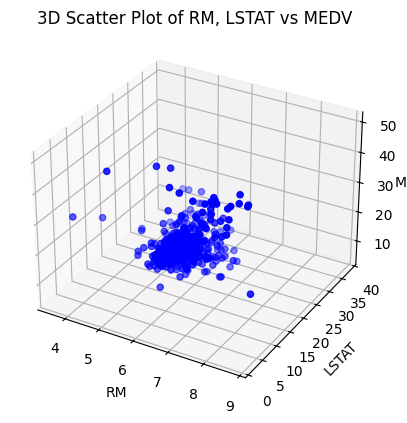

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['RM'],df['LSTAT'],df['MEDV'], c='b', marker='o')

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
ax.set_title('3D Scatter Plot of RM, LSTAT vs MEDV')

In [11]:
X= df[['RM','LSTAT']]
y=df["MEDV"]
from sklearn.model_selection import train_test_split
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
feature_names = ['LSTAT', 'RM']
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)
print("Scaled Training Set:\n", X_train_scaled_df)
print("Scaled Test Set:\n", X_test_scaled_df)

Scaled Training Set:
         LSTAT        RM
0    0.293065  0.639625
1    0.400854  0.185982
2    0.440919  0.168322
3    0.455562  0.594923
4    0.379093  0.263521
..        ...       ...
399  0.401261  0.467163
400  0.405328  0.310982
401  0.563758  0.117550
402  0.562538  0.594371
403  0.516982  0.245585

[404 rows x 2 columns]
Scaled Test Set:
         LSTAT        RM
0    0.519219  0.201711
1    0.588774  0.049669
2    0.431157  0.450883
3    0.447834  0.104581
4    0.495017  0.428808
..        ...       ...
97   0.155583  0.900662
98   0.528371  0.450331
99   0.568233  0.537804
100  0.437665  0.307119
101  0.492780  0.198951

[102 rows x 2 columns]


In [15]:

sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.0001,max_iter=1000,verbose=1)

In [19]:
n_iter = 1000  # total number of iterations
loss_values = []



for i in range(n_iter):
    sgdr.partial_fit(X_train_scaled, y_train)
    loss = np.mean((sgdr.predict(X_train_scaled) - y_train) ** 2)  # MSE as loss
    loss_values.append(loss)

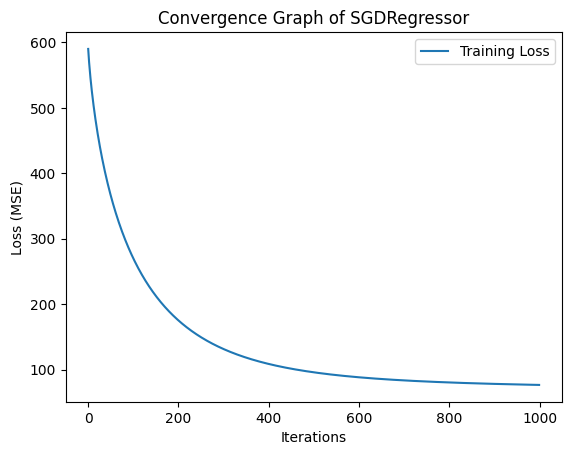

In [17]:
plt.plot(range(n_iter), loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Convergence Graph of SGDRegressor')
plt.legend()
plt.show()

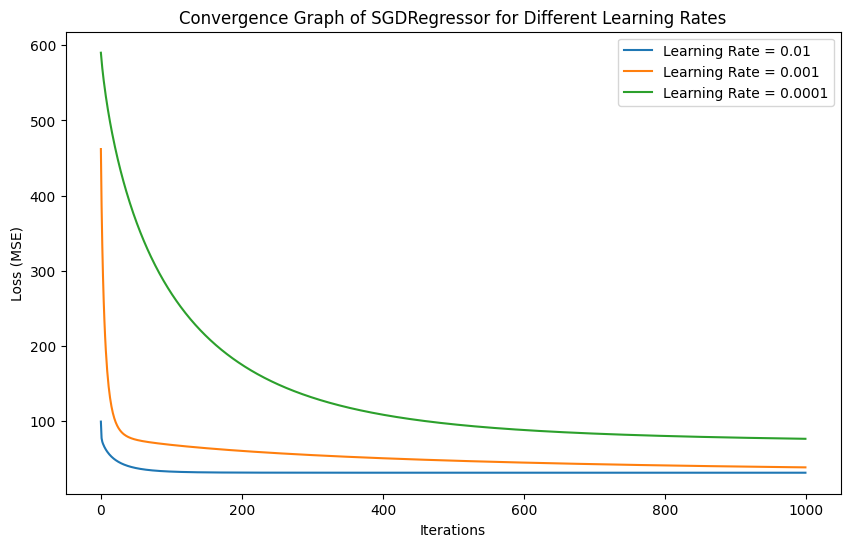

In [34]:
learning_rates = [0.01, 0.001, 0.0001]
n_iter = 1000 # total number of iterations

# Dictionary to store loss values for each learning rate
losses = {lr: [] for lr in learning_rates}

# Training loop for each learning rate
for lr in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr, max_iter=1000,tol=1e-6, warm_start=True, verbose=0)
    loss_values = []
    
    # Train for n_iter iterations and record the loss at each step
    for i in range(n_iter):
        sgdr.partial_fit(X_train_scaled, y_train)
        loss = np.mean((sgdr.predict(X_train_scaled) - y_train) ** 2)  # MSE as loss
        loss_values.append(loss)
    
    # Store the losses for this learning rate
    losses[lr] = loss_values

# Plot the convergence graph for each learning rate
plt.figure(figsize=(10, 6))
for lr, loss_values in losses.items():
    plt.plot(range(n_iter), loss_values, label=f'Learning Rate = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Convergence Graph of SGDRegressor for Different Learning Rates')
plt.legend()
plt.show()

In [35]:
performance_metrics = {}

# Evaluate the models with different learning rates on the test set
for lr in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr, max_iter=n_iter, tol=1e-6, verbose=0)
    sgdr.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = sgdr.predict(X_test_scaled)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the metrics in the dictionary
    performance_metrics[lr] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Display performance metrics for each learning rate
metrics_df = pd.DataFrame(performance_metrics).T
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R2']]  # Reorder for better display
print("Performance Metrics of Each Model on the Test Set:\n", metrics_df)

# Question 6: Select the best model based on performance metrics (R-squared)
best_lr = metrics_df['R2'].idxmax()
print(f"\nThe best model is with learning rate {best_model_lr} based on R-squared (R2).")

Performance Metrics of Each Model on the Test Set:
              MAE        MSE      RMSE        R2
0.0100  3.874748  31.052821  5.572506  0.576555
0.0010  4.018174  34.791576  5.898438  0.525572
0.0001  5.616113  65.912172  8.118631  0.101203

The best model is with learning rate 0.01 based on R-squared (R2).


C:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [36]:
best_model = SGDRegressor(learning_rate='invscaling', eta0=best_lr, max_iter=n_iter, tol=1e-6)
best_model.fit(X_train_scaled, y_train)


SGDRegressor(eta0=np.float64(0.01), tol=1e-06)

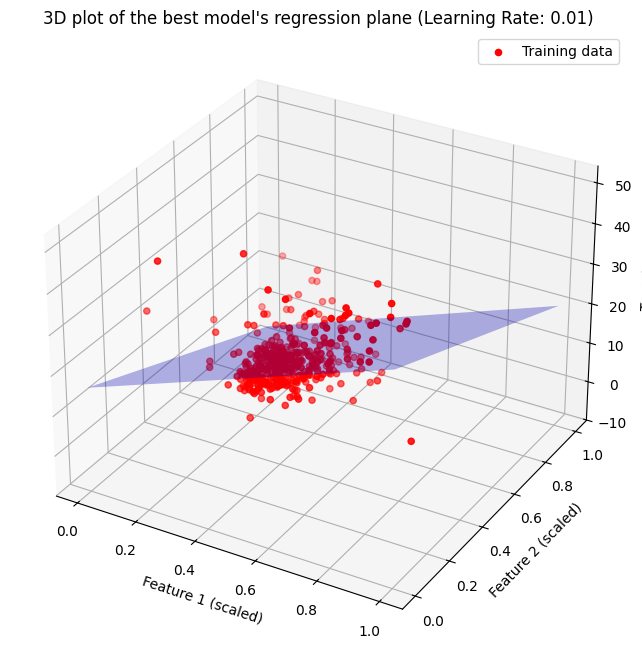

In [37]:
# Create a meshgrid for plotting the plane
x1_range = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100)
x2_range = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Predict the values on the grid points (for the plane)
grid_points = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred_grid = best_model.predict(grid_points)
y_pred_plane = y_pred_grid.reshape(x1_mesh.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the training data (actual points)
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train, color='r', label='Training data')

# Plot the regression plane
ax.plot_surface(x1_mesh, x2_mesh, y_pred_plane, color='b', alpha=0.3, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel('Feature 1 (scaled)')
ax.set_ylabel('Feature 2 (scaled)')
ax.set_zlabel('Target')
ax.set_title(f"3D plot of the best model's regression plane (Learning Rate: {best_lr})")

# Show the plot
plt.legend()
plt.show()

In [44]:
# Suppose you want to predict MEDV for a specific row in df, let's say the first row
sample = df[['LSTAT', 'RM']].iloc[0].values.reshape(1, -1)  # Get the first row of LTSAT and RM as a sample

# Scale the sample using the same scaler as the training data
sample_scaled = scaler.transform(sample)

# Predict the MEDV using the best model
predicted_MEDV = best_model.predict(sample_scaled)

# Display the predicted value of MEDV
print(f"Predicted MEDV for the sample (LTSAT={sample[0][0]}, RM={sample[0][1]}): {predicted_MEDV[0]}")


Predicted MEDV for the sample (LTSAT=4.98, RM=6.575): 19.149106038491414
